In [1]:
import os
import numpy as np
import pandas as pd
import rasterio as rio
import geopandas as gpd
from rasterio.plot import show
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

-------------------------

# __Kansas GMD__

## Is ET more correlated to precipitation or Irrigation?

### ET vs Precip : Irrigated

In [21]:
KS_monthly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/KS_monthly.csv')
# KS_monthly_df.head()

In [22]:
KS_irrigated_df = KS_monthly_df[KS_monthly_df['Irrigated'] == 1]
# KS_irrigated_df.head()

In [23]:
x = KS_irrigated_df[['PRISM_PPT']]
y = KS_irrigated_df[['Irrigated_cropET']]

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

# linear model
lm = LinearRegression()
lm_trained = lm.fit(x_train, y_train)
lm_trained.coef_

array([[0.16587552]])

Coefficient of determination: 0.05


Text(0, 0.5, 'Monthly Irrigated cropET (mm)')

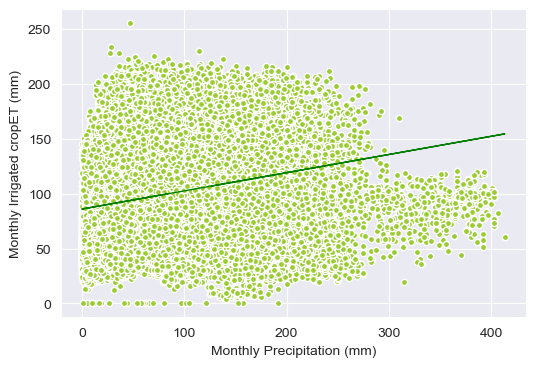

In [24]:
# R2 
y_test_pred = lm_trained.predict(x_test)
r2 = r2_score(y_test, y_test_pred)

# plot performance
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style("darkgrid")

print("Coefficient of determination: %.2f" % r2)
plt.scatter(x_test, y_test, facecolor='yellowgreen', edgecolor='white', s=20)
plt.plot(x_test, y_test_pred, color='green', linewidth=1)
plt.xlabel('Monthly Precipitation (mm)')
plt.ylabel('Monthly Irrigated cropET (mm)')

### ET vs Precip : Rainfed

In [18]:
KS_rainfed_df = KS_monthly_df[KS_monthly_df['Rainfed'] == 1]
# KS_rainfed_df.head()

In [19]:
x = KS_rainfed_df[['PRISM_PPT']]
y = KS_rainfed_df[['Rainfed_cropET']]

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)
x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

# linear model
lm = LinearRegression()
lm_trained = lm.fit(x_train, y_train)
lm_trained.coef_

array([[0.20065826]])

Coefficient of determination: 0.11


Text(0, 0.5, 'Monthly Rainfed cropET (mm)')

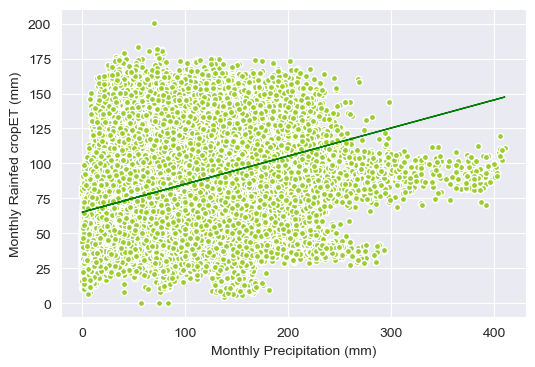

In [20]:
# R2 
y_test_pred = lm_trained.predict(x_test)
r2 = r2_score(y_test, y_test_pred)

# plot performance
fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style("darkgrid")
print("Coefficient of determination: %.2f" % r2)
plt.scatter(x_test, y_test, facecolor='yellowgreen', edgecolor='white', s=20)
plt.plot(x_test, y_test_pred, color='green', linewidth=1)
plt.xlabel('Monthly Precipitation (mm)')
plt.ylabel('Monthly Rainfed cropET (mm)')

Monthly ET responses similary to monthly precipitation in Kansas for both Irrigated and Rainfed croplands, i.e., __precipitation has some effect on cropET__. Does it mean __irrigation has minimal to no effect on ET__? To prove this hypothesis, we compare annual ET with annual irrigation and annual pumping.

### Annual ET vs Irrigation : GMD, KS (Irrigated)

In [16]:
gmd4_df = pd.read_csv('../../Data_main/Data_drivers_of_ET/CSVs/KS_GW_GMD4_updated.csv')
gmd4_df.columns

Index(['Acres', 'CDL', 'GPM_PPT', 'OBJECTID', 'PDIV_ID', 'PRISM_PPT',
       'PRISM_TMAX', 'SSEBop', 'TC_PPT', 'TC_RO', 'TC_SM', 'TC_TMAX', 'WU_AF',
       'WU_mm', 'Year', 'gmd', 'lat_nad83', 'long_nad83', 'FREQUENCY', 'Crop',
       'Irrigated_cropET', 'OpenET'],
      dtype='object')

In [17]:
gmd4_df = gmd4_df[gmd4_df['WU_mm'] < 2000]
gmd4_df = gmd4_df[gmd4_df['Irrigated_cropET'] != 0]

In [18]:
# Irrigation vs openET
x_1 = gmd4_df[['WU_mm']]
y_1 = gmd4_df[['OpenET']]

# train-test split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3, random_state=0, shuffle=True)
x_train_1, x_test_1, y_train_1, y_test_1 = x_train_1.values, x_test_1.values, y_train_1.values, y_test_1.values

# linear model
lm = LinearRegression()
lm_trained_1 = lm.fit(x_train_1, y_train_1)
lm_trained_1.coef_

# Irrigation vs Irrigated cropET
x_2 = gmd4_df[['WU_mm']]
y_2 = gmd4_df[['Irrigated_cropET']]

# train-test split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0, shuffle=True)
x_train_2, x_test_2, y_train_2, y_test_2 = x_train_2.values, x_test_2.values, y_train_2.values, y_test_2.values

# linear model
lm = LinearRegression()
lm_trained_2 = lm.fit(x_train_2, y_train_2)
lm_trained_2.coef_

array([[0.15166128]])

(300.0, 950.0)

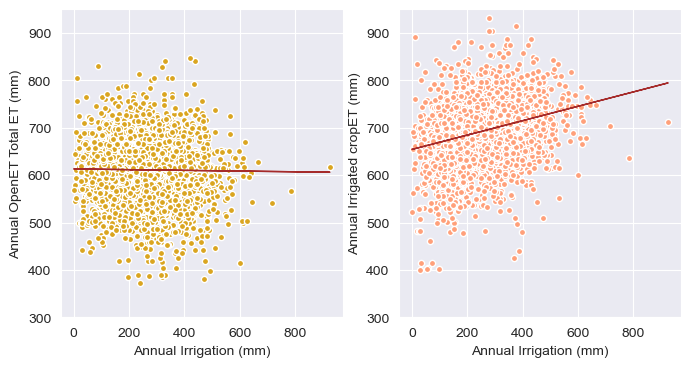

In [19]:
# prediction total OpenET vs irrigation model
y_test_pred_1 = lm_trained_1.predict(x_test_1)

# prediction irrigated cropET vs irrigation model
y_test_pred_2 = lm_trained_2.predict(x_test_2)

# plot
fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].scatter(x_test_1, y_test_1, facecolor='goldenrod', edgecolor='white', s=20)
ax[0].plot(x_test_1, y_test_pred_1, color="brown", linewidth=1)
ax[0].set_xlabel('Annual Irrigation (mm)')
ax[0].set_ylabel('Annual OpenET Total ET (mm)')
ax[0].set_ylim(300, 950)

ax[1].scatter(x_test_2, y_test_2, facecolor='lightsalmon', edgecolor='white', s=20)
ax[1].plot(x_test_2, y_test_pred_2, color="brown", linewidth=1)
ax[1].set_xlabel('Annual Irrigation (mm)')
ax[1].set_ylabel('Annual Irrigated cropET (mm)')
ax[1].set_ylim(300, 950)

Looks like annual total ET can't be correlated to Irrigation. But if we compare annual irrigated cropET with annual irrigatiom, then we can __correlate irrigated cropET and Irrigation__. 

### Precipitation vs Irrigation in GMD4

In [14]:
KS_yearly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/KS_yearly.csv')
KS_rainfed_df = KS_yearly_df[KS_yearly_df['Rainfed'] == 1]
KS_rainfed_df.head()

,USDA_CDL,Irrigated,Rainfed,Irrigated_cropET,Rainfed_cropET,PRISM_PPT
0,176.0,0.0,1.0,0.0,497.85815,678.07697
1,1.0,0.0,1.0,0.0,561.62964,681.15906
3,176.0,0.0,1.0,0.0,523.50270,688.88200
4,176.0,0.0,1.0,0.0,505.55640,675.90900
6,176.0,0.0,1.0,0.0,481.29700,619.82890


In [20]:
# Irrigation vs Precipitation linear model
x_3 = gmd4_df[['PRISM_PPT']]
y_3 = gmd4_df[['WU_mm']]

# train-test split
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y_3, test_size=0.3, random_state=0, shuffle=True)
x_train_3, x_test_3, y_train_3, y_test_3 = x_train_3.values, x_test_3.values, y_train_3.values, y_test_3.values

# linear model
lm_3 = LinearRegression()
lm_trained_3 = lm_3.fit(x_train_3, y_train_3)


# Irrigated cropET vs Precipitation linear model
x_4 = gmd4_df[['PRISM_PPT']]
y_4 = gmd4_df[['Irrigated_cropET']]

# train-test split
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_4, y_4, test_size=0.3, random_state=0, shuffle=True)
x_train_4, x_test_4, y_train_4, y_test_4 = x_train_4.values, x_test_4.values, y_train_4.values, y_test_4.values

# linear model
lm_4 = LinearRegression()
lm_trained_4 = lm_4.fit(x_train_4, y_train_4)


# Rainfed cropET vs Precipitation linear model
x_5 = KS_rainfed_df[['PRISM_PPT']]
y_5 = KS_rainfed_df[['Rainfed_cropET']]

# train-test split
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_5, y_5, test_size=0.3, random_state=0, shuffle=True)
x_train_5, x_test_5, y_train_5, y_test_5 = x_train_5.values, x_test_5.values, y_train_5.values, y_test_5.values

# linear model
lm_5 = LinearRegression()
lm_trained_5 = lm_5.fit(x_train_5, y_train_5)

In [58]:
# prediction total OpenET vs irrigation model
y_test_pred_3 = lm_trained_3.predict(x_test_3)

# prediction irrigated cropET vs irrigation model
y_test_pred_4 = lm_trained_4.predict(x_test_4)

# prediction rainfed cropET vs irrigation model
y_test_pred_5 = lm_trained_5.predict(x_test_5)

print(f'Slope of Annual Irrigation vs precipitation {lm_trained_3.coef_}')
print(f'Slope of Annual Irrigated cropET vs precipitation {lm_trained_4.coef_}')
print(f'Slope of Annual Rainfed cropET vs precipitation {lm_trained_5.coef_}')

print(f'Slope of Annual Irrigation vs precipitation after removing effect of rainfed cropET {lm_trained_4.coef_[0][0] - lm_trained_5.coef_[0][0]}')

Slope of Annual Irrigation vs precipitation [[-0.33589109]]
Slope of Annual Irrigated cropET vs precipitation [[-0.06989767]]
Slope of Annual Rainfed cropET vs precipitation [[0.30948941]]
Slope of Annual Irrigation vs precipitation after removing effect of rainfed cropET -0.3793870839528578


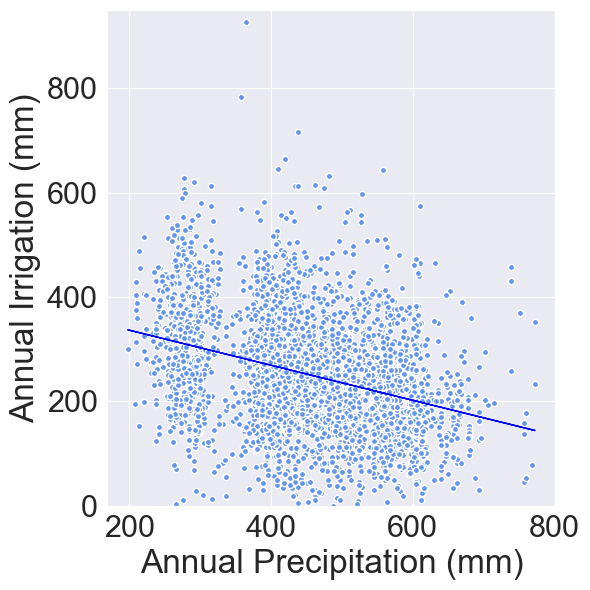

In [65]:
# plot
fig, ax = plt.subplots(figsize=(6,6))
sns.set_style("darkgrid")
fig.set_facecolor('none')

ax.scatter(x_test_3, y_test_3, facecolor='cornflowerblue', edgecolor='white', s=20)
ax.plot(x_test_3, y_test_pred_3, color="blue", linewidth=1)
ax.set_xlabel('Annual Precipitation (mm)', fontsize=24)
ax.set_ylabel('Annual Irrigation (mm)', fontsize=24)
ax.set_ylim(0, 950)
ax.tick_params(axis='both', labelsize=22)
plt.tight_layout()

current_dir = os.getcwd()
figdir = 'figs'
figname = 'KS_irrigation_precip_linearity.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)

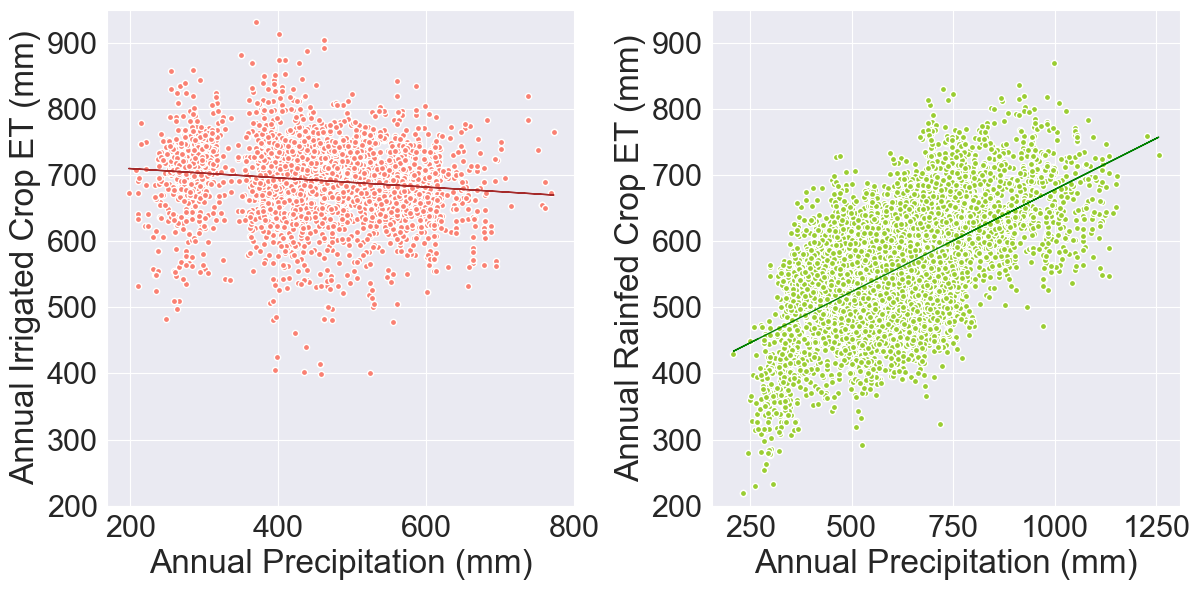

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.set_style("darkgrid")
fig.set_facecolor('none')

ax[0].scatter(x_test_4, y_test_4, facecolor='salmon', edgecolor='white', s=20)
ax[0].plot(x_test_4, y_test_pred_4, color="brown", linewidth=1)
ax[0].set_xlabel('Annual Precipitation (mm)', fontsize=24)
ax[0].set_ylabel('Annual Irrigated Crop ET (mm)', fontsize=24)
ax[0].set_ylim(200, 950)
ax[0].tick_params(axis='both', labelsize=22)

ax[1].scatter(x_test_5, y_test_5, facecolor='yellowgreen', edgecolor='white', s=20)
ax[1].plot(x_test_5, y_test_pred_5, color="green", linewidth=1)
ax[1].set_xlabel('Annual Precipitation (mm)', fontsize=24)
ax[1].set_ylabel('Annual Rainfed Crop ET (mm)', fontsize=24)
ax[1].set_ylim(200, 950)
ax[1].tick_params(axis='both', labelsize=22)
plt.tight_layout()

current_dir = os.getcwd()
figdir = 'figs'
figname = 'KS_irrigated_rainfed_ET_precip_linearity.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)

- In Kansas GMD4, with precipitation irrigation reduces. This can be justified by the notion that -__lesser demand of irrigation with more precipitation__. The irrigated cropET vs  precipitation in plot2 shows the same trend as plot 1 with a less stronger relationship. The magnitude of annual irrigated cropET is higher in plot 2 than irrigation in plot 1 due to the reason that ET not only controlled by irrigation but also precipitation. 
- Plot 2 here shows that with more precipitation, annual irrigated cropET slightly decreases with precipiation which contradicts the plot 1 (green plot in the beginning of this notebook) between monthly irrigated cropET vs monthly precipitation (positive trend of monthly irrigated cropET with precipitation). We can say that - __in smaller time scale (monthly), irrigated cropET is dependent on precipitation. But in annual time scale (annual) the relation between irrigated cropET and precipitation is slightly negative (prbably more dependence on effective precip/precip stored in soil.__

- The irrigated cropET vs precipitation plot can be used for regions with no irrigation data to assess the relationship between irrigated cropET and precipitation. The negative slope of this plot will give out __how much precipitation reduces the need of irrigation.__ Also, __can we separate the effect of precipitation from this to only understand the effect of irrigation from irrigated cropET?__ `Yes we can!!` By deducting the slope of annual rainfed cropET vs precipitation from the slope of annual irrigated cropET vs precipiation. The resulting slope is very close to the slope of irrigation vs precipitation. __We can explore ways to use it as a tool for deciding whether we are over or under-irrigating at basin scale.__

# How ET varies with crop type

In [3]:
# USDA CDL crop classification
USDA_cdl_class_df = pd.read_csv('../../Data_main\Data_Drivers_of_ET/CSVs/USDA_cdl_classification.csv')
USDA_cdl_class_df = USDA_cdl_class_df.set_index(keys='Class')
USDA_cdl_class_df.head()

,Crop,min_wrq,avg_wrq,max_wrq
Class,,,,
1,Corn,600.0,680.0,760.0
2,Cotton,700.0,1000.0,1300.0
3,Rice,450.0,575.0,700.0
4,Sorghum,530.0,680.0,830.0
5,Soybeans,450.0,600.0,750.0


In [4]:
# making the df to a dictionary
usda_cdl_dict = USDA_cdl_class_df.to_dict()
usda_cdl_dict = usda_cdl_dict['Crop']
# usda_cdl_dict

## Irrigated vs rainfed monthly

In [5]:
KS_monthly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/KS_monthly.csv')

# irrigated and rainfed crop status and irrigated and rainfed cropET are exclusive. Creating columns to bring them in same colums for plotting purpose
KS_monthly_df['Irrig_stat'] = ['Irrigated'  if i == 1 else 'Rainfed' for i in KS_monthly_df.Irrigated] 
KS_monthly_df['Irrig_rainfed_cropET'] = KS_monthly_df['Irrigated_cropET'] + KS_monthly_df['Rainfed_cropET']

# filtering out some cells which are neither irrigated or rainfed (0 values were assigned from reference raster)
KS_monthly_df = KS_monthly_df[(KS_monthly_df.Irrigated == 1) | (KS_monthly_df.Rainfed == 1)]

# mapping name of crop type using USDA CDL dictionary
KS_monthly_df.loc[:, 'Crop'] = KS_monthly_df['USDA_CDL'].map(usda_cdl_dict)
KS_monthly_df.head()

,OpenET,year,month,Irrigated_cropET,Rainfed_cropET,PRISM_PPT,USDA_CDL,Irrigated,Rainfed,Irrig_stat,Irrig_rainfed_cropET,Crop
0,54.0,2016,4,0.0,40.293280,149.605,176.0,0.0,1.0,Rainfed,40.293280,Grassland/Pasture
1,55.0,2016,4,0.0,50.146080,146.927,1.0,0.0,1.0,Rainfed,50.146080,Corn
3,46.0,2016,4,0.0,51.073740,148.322,176.0,0.0,1.0,Rainfed,51.073740,Grassland/Pasture
4,47.0,2016,4,0.0,46.523563,153.007,176.0,0.0,1.0,Rainfed,46.523563,Grassland/Pasture
6,51.0,2016,4,0.0,46.454662,154.693,176.0,0.0,1.0,Rainfed,46.454662,Grassland/Pasture


In [6]:
# Filtering Irrigated data only for KS
KS_irrigated_df = KS_monthly_df[KS_monthly_df['Irrigated'] == 1]
print(f'{len(KS_irrigated_df.Crop.unique())} Unique irrigated crop types in GMD', KS_irrigated_df.Crop.unique())
KS_irrigated_df_filtered = KS_irrigated_df[KS_irrigated_df['Crop'].isin(['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans'])]
KS_irrigated_df_filtered = KS_irrigated_df_filtered[KS_irrigated_df['month'].isin([6, 7, 8, 9, 10])]

# Filtering Rainfed data only for KS
KS_rainfed_df = KS_monthly_df[KS_monthly_df['Rainfed'] == 1]
print(f'{len(KS_rainfed_df.Crop.unique())}Unique rainfed crop types in GMD', KS_rainfed_df.Crop.unique())
KS_rainfed_df_filtered = KS_rainfed_df[KS_rainfed_df['Crop'].isin(['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans', 'Grassland/Pasture'])]
KS_rainfed_df_filtered = KS_rainfed_df_filtered[KS_rainfed_df_filtered['month'].isin([6, 7, 8, 9, 10])]

23 Unique irrigated crop types in GMD ['Corn' 'Winter Wheat' 'Grassland/Pasture' 'Sorghum' 'Alfalfa' 'Oats'
 'Soybeans' 'Sunflower' 'Dbl Crop WinWht/Soybeans' 'Rye'
 'Dbl Crop WinWht/Sorghum' 'Dbl Crop WinWht/Corn' 'Triticale' 'Canola'
 'Cotton' 'Dry Beans' 'Other Hay/Non Alfalfa' 'Peas'
 'Dbl Crop Triticale/Corn' 'Barley' 'Potatoes' 'Spring Wheat' 'Millet']
17Unique rainfed crop types in GMD ['Grassland/Pasture' 'Corn' 'Winter Wheat' 'Sorghum' 'Alfalfa' 'Oats'
 'Rye' 'Soybeans' 'Sunflower' 'Dbl Crop WinWht/Sorghum' 'Millet' 'Canola'
 'Cotton' 'Triticale' 'Dbl Crop WinWht/Corn' 'Other Hay/Non Alfalfa'
 'Dbl Crop WinWht/Soybeans']


C:\Users\fahim\AppData\Local\Temp\ipykernel_29476\7339014.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  KS_irrigated_df_filtered = KS_irrigated_df_filtered[KS_irrigated_df['month'].isin([6, 7, 8, 9, 10])]


(0.0, 300.0)

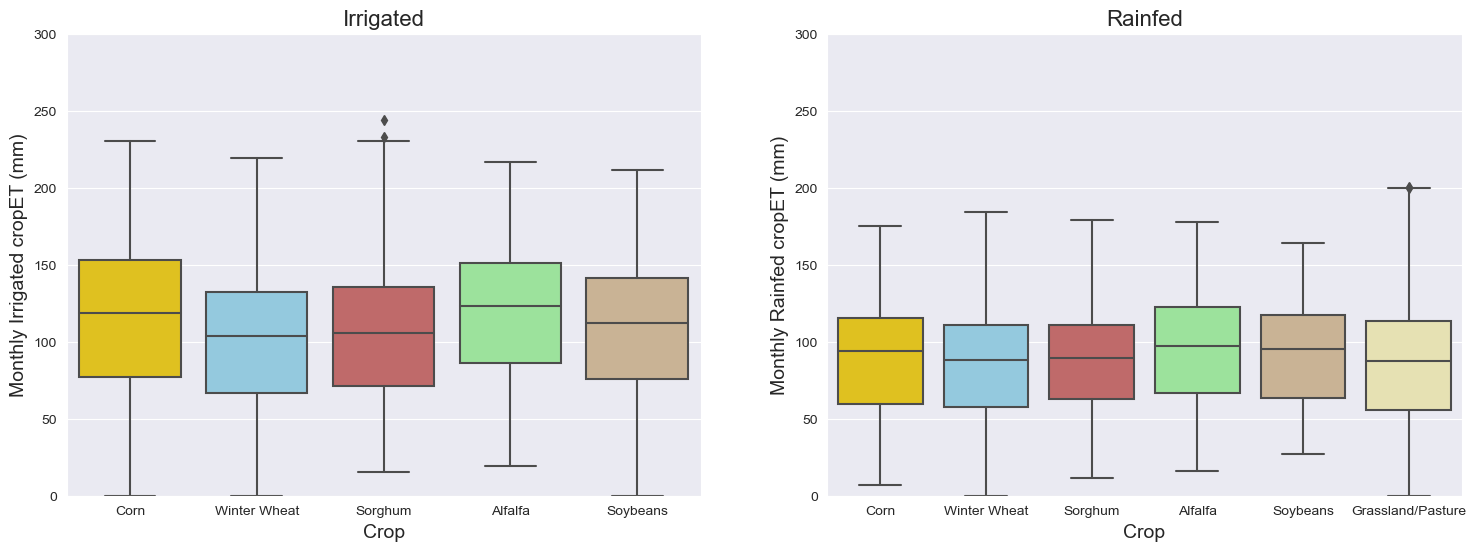

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.set_style("darkgrid")

# setting similar color palette for similar crops 
category_colors = {'Corn': 'gold', 'Winter Wheat': 'skyblue', 'Sorghum': 'indianred', 'Alfalfa': 'lightgreen', 
                          'Soybeans': 'tan', 'Grassland/Pasture': 'palegoldenrod'}

# category order
category_order_irr = ['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans']
category_order_rain = ['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans', 'Grassland/Pasture']

# irrigated
sns.boxplot(x=KS_irrigated_df_filtered['Crop'], y=KS_irrigated_df_filtered['Irrigated_cropET'], ax=ax[0], palette=category_colors, order=category_order_irr)
ax[0].set_xlabel('Crop', fontsize=14)
ax[0].set_ylabel('Monthly Irrigated cropET (mm)', fontsize=14)
ax[0].tick_params(axis='both', labelsize=10)
ax[0].set_title('Irrigated', fontsize=16)
ax[0].set_ylim(0, 300)

# rainfed
sns.boxplot(x=KS_rainfed_df_filtered['Crop'], y=KS_rainfed_df_filtered['Rainfed_cropET'], ax=ax[1], palette=category_colors, order=category_order_rain)
ax[1].set_xlabel('Crop', fontsize=14)
ax[1].set_ylabel('Monthly Rainfed cropET (mm)', fontsize=14)
ax[1].tick_params(axis='both', labelsize=10)
ax[1].set_title('Rainfed', fontsize=16)
ax[1].set_ylim(0, 300)

Slightly higher growing season monthly ET in irrigated crops than rainfed crops in __GMD__ Kansas.

In the rainfed fields, the ET is consistently low for major crop types for months `6-10`. But when we only do the aggregation for `4-6`, rainfed cropET is low. Lets check it out for major crops for each month.

`Possibly we can use this to calculate a ratio between rainfed cropET (effective precip) and Irrigated cropET for each crop. Though the ratios will be extracted from 30m scale, they can be used to extract the effective precipitation information from irrigated cropET data at 2km scale.`

#### Corn

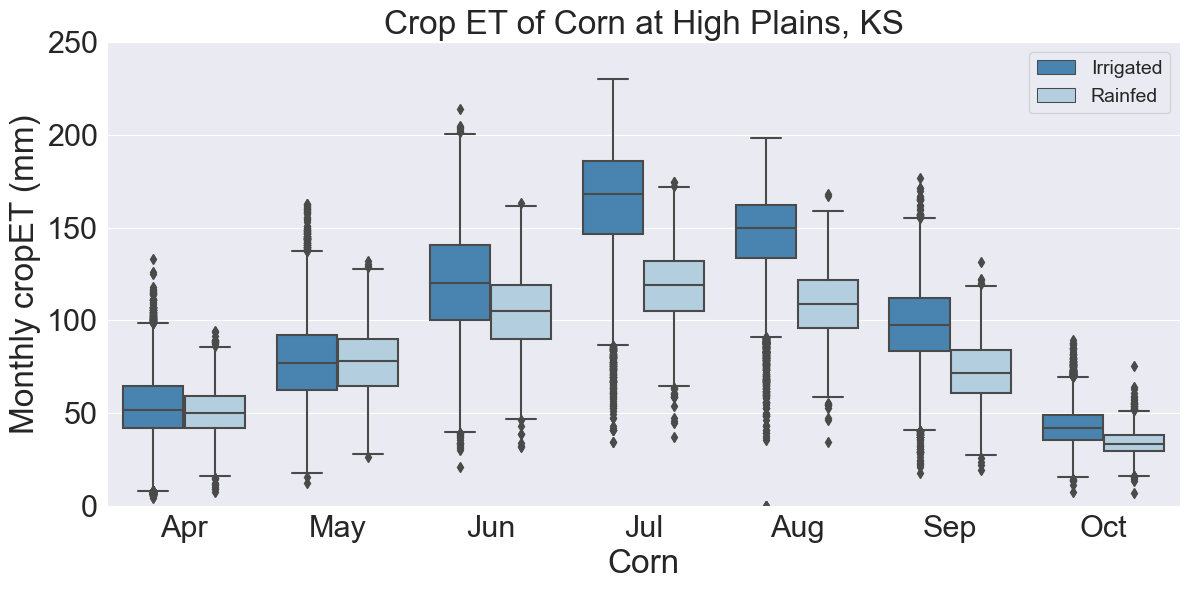

In [11]:
KS_df_crop = KS_monthly_df[KS_monthly_df['Crop'] == 'Corn']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid")
fig.set_facecolor('none')

sns.boxplot(x=KS_df_crop['month'], y=KS_df_crop['Irrig_rainfed_cropET'], ax=ax, 
            hue=KS_df_crop['Irrig_stat'], hue_order=['Irrigated', 'Rainfed'], 
            palette='Blues_r')
ax.set_xlabel('Corn', fontsize=24)
ax.set_ylabel('Monthly cropET (mm)', fontsize=24)
ax.set_xticklabels(months)
ax.tick_params(axis='both', labelsize=22)
ax.set_title('Crop ET of Corn at High Plains, KS', fontsize=24)
ax.set_ylim(0, 250)
ax.legend(prop = { "size": 14})
plt.tight_layout()


current_dir = os.getcwd()
figdir = 'figs'
figname = 'corn_KS_monthly_cropET.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)

For corn, median irrigated and rainfed cropET is almost the same for `4-5` but median __irrigated cropET > rainfed cropET__ for `6-10`.

#### Winter Wheat

(0.0, 300.0)

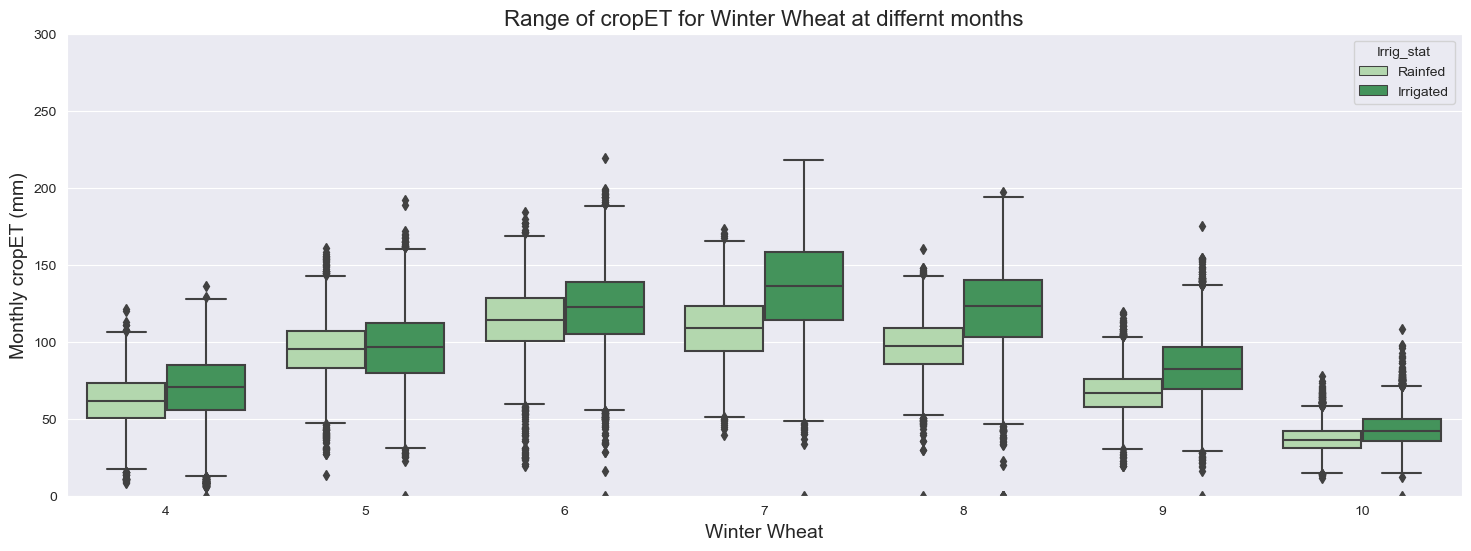

In [43]:
KS_df_crop = KS_monthly_df[KS_monthly_df['Crop'] == 'Winter Wheat']

fig, ax = plt.subplots(figsize=(18, 6))
sns.set_style("darkgrid")

sns.boxplot(x=KS_df_crop['month'], y=KS_df_crop['Irrig_rainfed_cropET'], ax=ax, hue=KS_df_crop['Irrig_stat'], palette='Greens')
ax.set_xlabel('Winter Wheat', fontsize=14)
ax.set_ylabel('Monthly cropET (mm)', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
ax.set_title('Range of cropET for Winter Wheat at differnt months', fontsize=16)
ax.set_ylim(0, 300)

For Winter Wheat, median irrigated and rainfed cropET is almost the same for `5` but median __irrigated cropET > rainfed cropET__ for `4, 6-10`.

#### Sorghum

(0.0, 300.0)

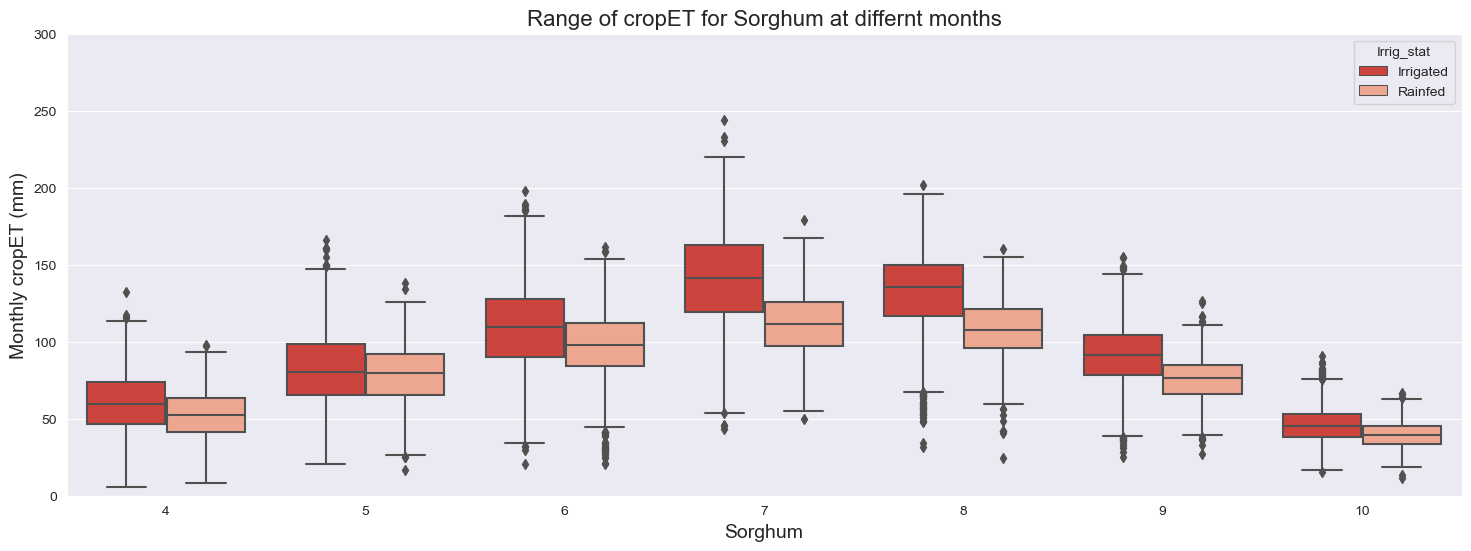

In [44]:
KS_df_crop = KS_monthly_df[KS_monthly_df['Crop'] == 'Sorghum']

fig, ax = plt.subplots(figsize=(18, 6))
sns.set_style("darkgrid")

sns.boxplot(x=KS_df_crop['month'], y=KS_df_crop['Irrig_rainfed_cropET'], ax=ax, hue=KS_df_crop['Irrig_stat'], palette='Reds_r')
ax.set_xlabel('Sorghum', fontsize=14)
ax.set_ylabel('Monthly cropET (mm)', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
ax.set_title('Range of cropET for Sorghum at differnt months', fontsize=16)
ax.set_ylim(0, 300)

For Sorghum, median irrigated and rainfed cropET is almost the same for `5` but median __irrigated cropET > rainfed cropET__ for `4, 6-10`.

#### Alfalfa

(0.0, 300.0)

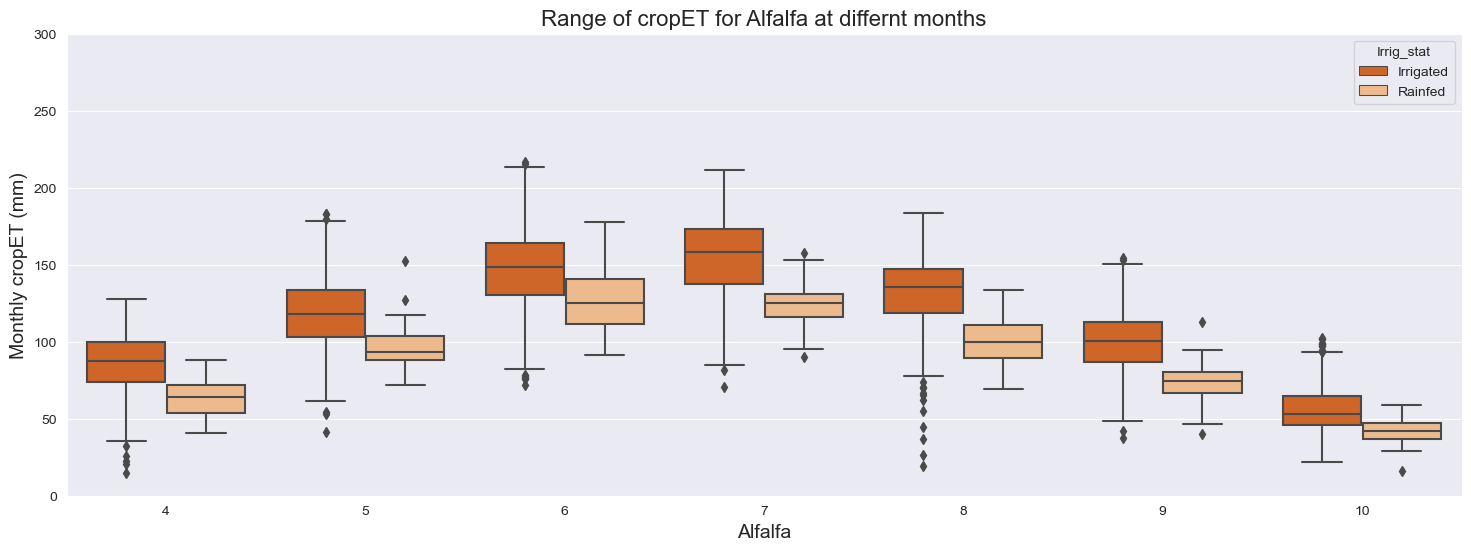

In [45]:
KS_df_crop = KS_monthly_df[KS_monthly_df['Crop'] == 'Alfalfa']

fig, ax = plt.subplots(figsize=(18, 6))
sns.set_style("darkgrid")

sns.boxplot(x=KS_df_crop['month'], y=KS_df_crop['Irrig_rainfed_cropET'], ax=ax, hue=KS_df_crop['Irrig_stat'], palette='Oranges_r')
ax.set_xlabel('Alfalfa', fontsize=14)
ax.set_ylabel('Monthly cropET (mm)', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
ax.set_title('Range of cropET for Alfalfa at differnt months', fontsize=16)
ax.set_ylim(0, 300)

For Alfalfa,  median __irrigated cropET > rainfed cropET__ for `4-10`.

#### Soybeans

(0.0, 300.0)

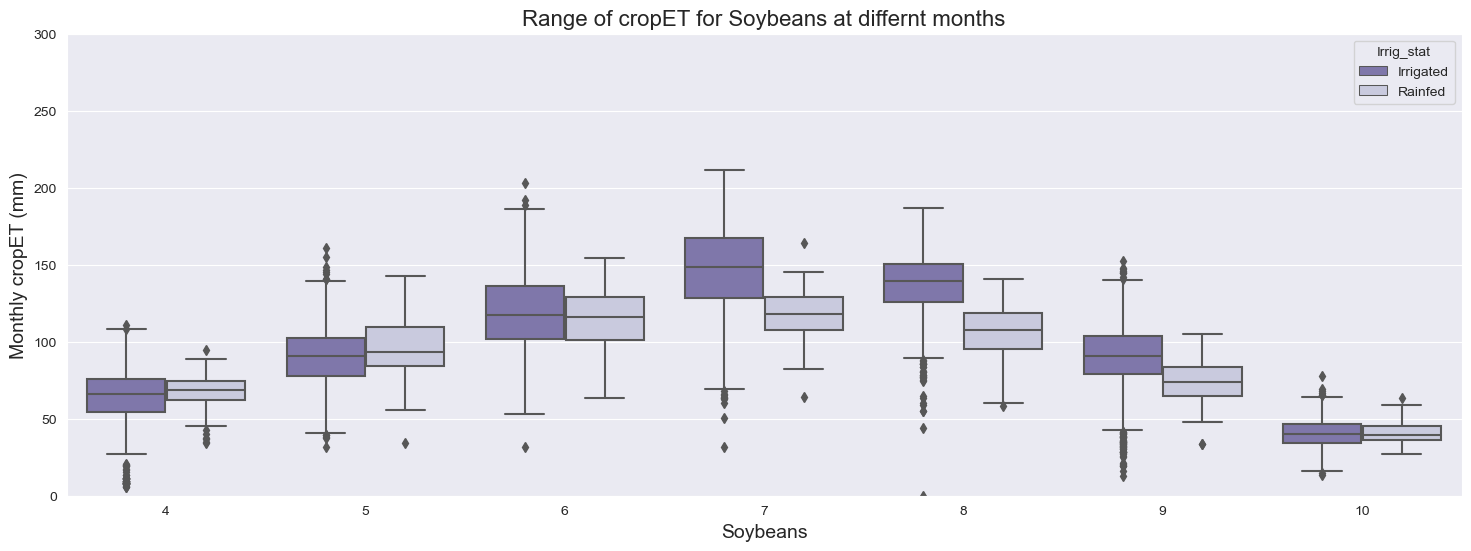

In [46]:
KS_df_crop = KS_monthly_df[KS_monthly_df['Crop'] == 'Soybeans']

fig, ax = plt.subplots(figsize=(18, 6))
sns.set_style("darkgrid")

sns.boxplot(x=KS_df_crop['month'], y=KS_df_crop['Irrig_rainfed_cropET'], ax=ax, hue=KS_df_crop['Irrig_stat'], palette='Purples_r')
ax.set_xlabel('Soybeans', fontsize=14)
ax.set_ylabel('Monthly cropET (mm)', fontsize=14)
ax.tick_params(axis='both', labelsize=10)
ax.set_title('Range of cropET for Soybeans at differnt months', fontsize=16)
ax.set_ylim(0, 300)

For Soybeans, median `irrigated cropET < rainfed cropET` for `4-5` but median __irrigated cropET > rainfed cropET__ for `6-10`.

- __This analysis of monthly irrigated vs rainfed cropET shows that median irrigated cropET > rainfed cropET for all crops from 6-10. In some cases, irrigated cropET < rainfed cropET for 4-5. This might to due to pumping starting from month 6. With varying difference between irrigated and rainfed cropET even for the same crop shows that estiamting fraction of effective precip and monthly scale might induce some uncertainty. We should rather do it at annual scale for months 4-10 (growing season) to reduce uncertainity.__

- __The difference in monthly irrigated and rainfed cropET also indicates that irrigation increases with decrease in precipitation (as rainfed cropET decreases).__

### Ratio between Rainfed cropET (Effective Precip) vs Irrigated cropET __Using monthly medians__

In [23]:
KS_irrigated_df_filtered = KS_irrigated_df[KS_irrigated_df['month'].isin([6, 7, 8, 9, 10])]
irrigated_cropET_df = KS_irrigated_df_filtered.groupby(by='Crop', axis=0)['Irrigated_cropET'].median()
irrigated_cropET_df = irrigated_cropET_df.reset_index()

KS_rainfed_df_filtered = KS_rainfed_df[KS_rainfed_df['month'].isin([6, 7, 8, 9, 10])]
rainfed_cropET_df = KS_rainfed_df_filtered.groupby(by='Crop', axis=0)['Rainfed_cropET'].median()
rainfed_cropET_df = rainfed_cropET_df.reset_index()

# merging 2 dataframes
effective_precip_ratio_df = irrigated_cropET_df.merge(rainfed_cropET_df, on=['Crop'], how='inner')
effective_precip_ratio_df['ratio_effec_precip'] = effective_precip_ratio_df['Rainfed_cropET'] / effective_precip_ratio_df['Irrigated_cropET']
effective_precip_ratio_df

,Crop,Irrigated_cropET,Rainfed_cropET,ratio_effec_precip
0,Alfalfa,123.504250,97.195345,0.786980
1,Canola,112.591835,50.370766,0.447375
2,Corn,118.511760,94.142450,0.794372
3,Cotton,114.739395,99.026330,0.863054
4,Dbl Crop WinWht/Corn,109.389230,86.283698,0.788777
5,Dbl Crop WinWht/Sorghum,111.226058,92.632370,0.832830
6,Dbl Crop WinWht/Soybeans,110.971700,97.447650,0.878131
7,Grassland/Pasture,115.342070,87.678770,0.760163
8,Millet,122.542310,46.630000,0.380522
9,Oats,98.451480,94.073645,0.955533


## Irrigated vs rainfed yearly

In [24]:
KS_yearly_df = pd.read_csv('../../Data_main/Data_Drivers_of_ET/CSVs/2km/KS_yearly.csv')

# irrigated and rainfed crop status and irrigated and rainfed cropET are exclusive. Creating columns to bring them in same colums for plotting purpose
KS_yearly_df['Irrig_stat'] = ['Irrigated'  if i == 1 else 'Rainfed' for i in KS_yearly_df.Irrigated] 
KS_yearly_df['Irrig_rainfed_cropET'] = KS_yearly_df['Irrigated_cropET'] + KS_yearly_df['Rainfed_cropET']

# filtering out some cells which are neither irrigated or rainfed (0 values were assigned from reference raster)
KS_yearly_df = KS_yearly_df[(KS_yearly_df.Irrigated == 1) | (KS_yearly_df.Rainfed == 1)]

# mapping name of crop type using USDA CDL dictionary
KS_yearly_df.loc[:, 'Crop'] = KS_yearly_df['USDA_CDL'].map(usda_cdl_dict)
KS_yearly_df.head()

,USDA_CDL,Irrigated,Rainfed,Irrigated_cropET,Rainfed_cropET,PRISM_PPT,Irrig_stat,Irrig_rainfed_cropET,Crop
0,176.0,0.0,1.0,0.0,497.85815,678.07697,Rainfed,497.85815,Grassland/Pasture
1,1.0,0.0,1.0,0.0,561.62964,681.15906,Rainfed,561.62964,Corn
3,176.0,0.0,1.0,0.0,523.50270,688.88200,Rainfed,523.50270,Grassland/Pasture
4,176.0,0.0,1.0,0.0,505.55640,675.90900,Rainfed,505.55640,Grassland/Pasture
6,176.0,0.0,1.0,0.0,481.29700,619.82890,Rainfed,481.29700,Grassland/Pasture


(0.0, 1100.0)

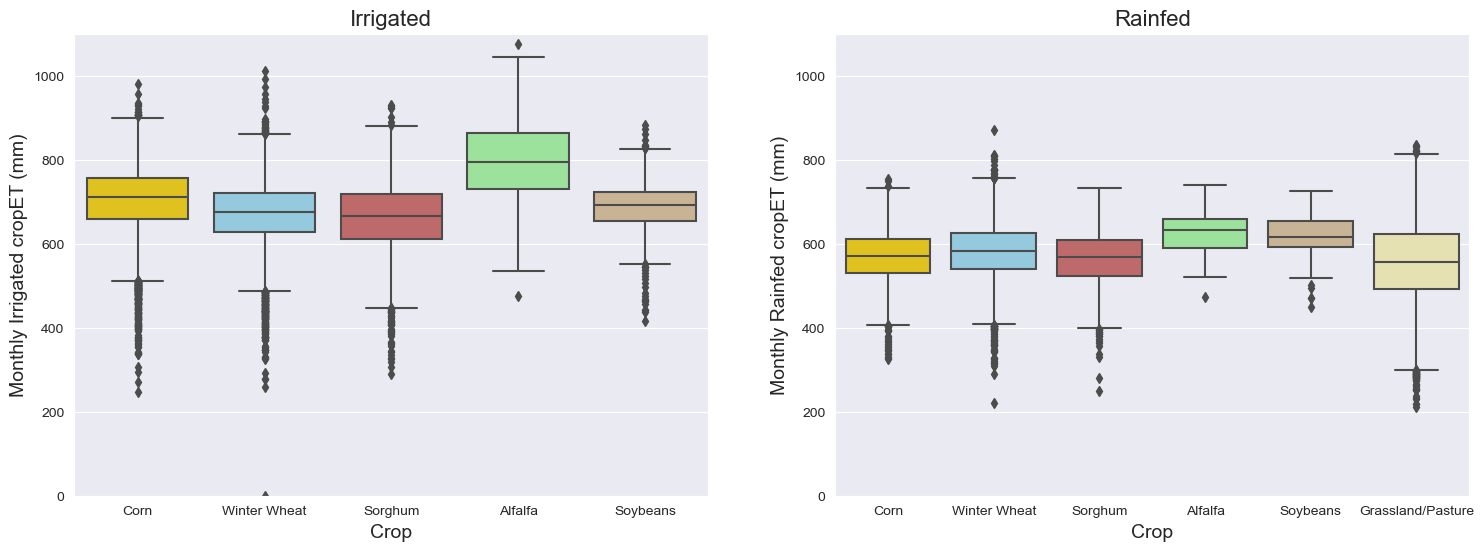

In [8]:
# Filtering Irrigated data only for KS
KS_irrigated_df = KS_yearly_df[KS_yearly_df['Irrigated'] == 1]
KS_irrigated_df_filtered = KS_irrigated_df[KS_irrigated_df['Crop'].isin(['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans'])]

# Filtering Rainfed data only for KS
KS_rainfed_df = KS_yearly_df[KS_yearly_df['Rainfed'] == 1]
KS_rainfed_df_filtered = KS_rainfed_df[KS_rainfed_df['Crop'].isin(['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans', 'Grassland/Pasture'])]

# Plotting major irrigated and rainfed crops' yearly irrigated and rainfed cropET
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.set_style("darkgrid")

# setting similar color palette for similar crops 
category_colors = {'Corn': 'gold', 'Winter Wheat': 'skyblue', 'Sorghum': 'indianred', 'Alfalfa': 'lightgreen', 
                          'Soybeans': 'tan', 'Grassland/Pasture': 'palegoldenrod'}

# category order
category_order_irr = ['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans']
category_order_rain = ['Corn', 'Winter Wheat', 'Sorghum', 'Alfalfa', 'Soybeans', 'Grassland/Pasture']

# irrigated
sns.boxplot(x=KS_irrigated_df_filtered['Crop'], y=KS_irrigated_df_filtered['Irrigated_cropET'], ax=ax[0], palette=category_colors, order=category_order_irr)
ax[0].set_xlabel('Crop', fontsize=14)
ax[0].set_ylabel('Monthly Irrigated cropET (mm)', fontsize=14)
ax[0].tick_params(axis='both', labelsize=10)
ax[0].set_title('Irrigated', fontsize=16)
ax[0].set_ylim(0, 1100)

# rainfed
sns.boxplot(x=KS_rainfed_df_filtered['Crop'], y=KS_rainfed_df_filtered['Rainfed_cropET'], ax=ax[1], palette=category_colors, order=category_order_rain)
ax[1].set_xlabel('Crop', fontsize=14)
ax[1].set_ylabel('Monthly Rainfed cropET (mm)', fontsize=14)
ax[1].tick_params(axis='both', labelsize=10)
ax[1].set_title('Rainfed', fontsize=16)
ax[1].set_ylim(0, 1100)

There seems to be lower rainfed cropET for all major crops at yearly scale.

### Ratio between Rainfed cropET (Effective Precip) vs Irrigated cropET __Using yearly medians__

In [25]:
KS_irrigated_df = KS_yearly_df[KS_yearly_df['Irrigated'] == 1]
irrigated_cropET_df_count = KS_irrigated_df.groupby(by='Crop', axis=0)['Irrigated_cropET'].count().reset_index()
irrigated_cropET_df_count = irrigated_cropET_df_count.rename(columns={'Irrigated_cropET': 'Irr_count'})
irrigated_cropET_df = KS_irrigated_df.groupby(by='Crop', axis=0)['Irrigated_cropET'].median()
irrigated_cropET_df = irrigated_cropET_df.reset_index()


KS_rainfed_df = KS_yearly_df[KS_yearly_df['Rainfed'] == 1]
rainfed_cropET_df_count = KS_rainfed_df.groupby(by='Crop', axis=0)['Rainfed_cropET'].count().reset_index()
rainfed_cropET_df_count = rainfed_cropET_df_count.rename(columns={'Rainfed_cropET': 'Rain_count'})
rainfed_cropET_df = KS_rainfed_df.groupby(by='Crop', axis=0)['Rainfed_cropET'].median()
rainfed_cropET_df = rainfed_cropET_df.reset_index()

# merging 2 dataframes
effective_precip_ratio_df = irrigated_cropET_df.merge(rainfed_cropET_df, on=['Crop']).merge(irrigated_cropET_df_count, on='Crop').merge(rainfed_cropET_df_count, on='Crop')
effective_precip_ratio_df['ratio_effec_precip'] = effective_precip_ratio_df['Rainfed_cropET'] / effective_precip_ratio_df['Irrigated_cropET']
effective_precip_ratio_df

,Crop,Irrigated_cropET,Rainfed_cropET,Irr_count,Rain_count,ratio_effec_precip
0,Alfalfa,794.906560,631.937500,829,40,0.794983
1,Canola,733.983640,420.501680,1,1,0.572903
2,Corn,710.277775,571.279360,11622,1893,0.804304
3,Cotton,702.655465,606.088260,92,7,0.862568
4,Dbl Crop WinWht/Corn,744.545600,633.168650,8,2,0.850409
5,Dbl Crop WinWht/Sorghum,706.157200,591.650600,18,9,0.837845
6,Dbl Crop WinWht/Soybeans,699.410100,599.741275,145,4,0.857496
7,Grassland/Pasture,713.503540,555.712615,6155,13364,0.778851
8,Millet,696.702000,406.563000,1,1,0.583554
9,Oats,604.395100,568.199000,7,4,0.940112


We can only trust crops that have relatively significat samples on both side (not disproportionate)
- Alfalfa, Corn, Barley, Corn, Dbl Crop WinWht/Sorghum, Grassland/Pasture, Rye, Sorghum, Soybeans, Winter Wheat

In [26]:
selected_crops = ['Alfalfa','Corn', 'Barley', 'Rye', 'Sorghum', 'Soybeans', 'Winter Wheat']
effective_precip_ratio_df = effective_precip_ratio_df[effective_precip_ratio_df['Crop'].isin(selected_crops)]
effective_precip_ratio_df = effective_precip_ratio_df.reset_index(drop=True)
effective_precip_ratio_df

,Crop,Irrigated_cropET,Rainfed_cropET,Irr_count,Rain_count,ratio_effec_precip
0,Alfalfa,794.906560,631.937500,829,40,0.794983
1,Corn,710.277775,571.279360,11622,1893,0.804304
2,Rye,708.155200,595.935700,157,22,0.841533
3,Sorghum,665.408260,568.709800,2271,879,0.854678
4,Soybeans,692.299130,615.786300,1427,95,0.889480
5,Winter Wheat,675.245060,583.439385,9217,3750,0.864041


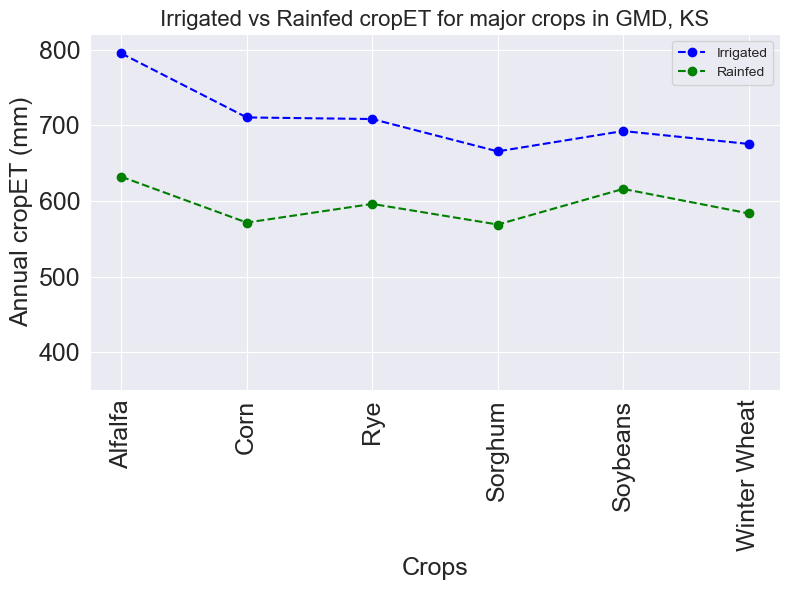

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("darkgrid")
fig.set_facecolor('none')

ax.plot(effective_precip_ratio_df.Irrigated_cropET, 'b--', label='Irrigated', marker='o')
ax.plot(effective_precip_ratio_df.Rainfed_cropET, 'g--', label='Rainfed', marker='o')
ax.set_xticks(list(range(len(effective_precip_ratio_df))), labels= effective_precip_ratio_df.Crop, rotation=90, fontsize=12)
ax.set_xlabel('Crops', fontsize=18)
ax.set_ylabel('Annual cropET (mm)', fontsize=18)
ax.tick_params(axis='both', labelsize=18)
ax.set_ylim(350, 820)
ax.set_title('Irrigated vs Rainfed cropET for major crops in GMD, KS', fontsize=16)
ax.legend()
plt.tight_layout()

current_dir = os.getcwd()
figdir = 'figs'
figname = 'Annual_Irrig_vs_Rain_cropET_KS.png'
fig.savefig(os.path.join(current_dir, figdir, figname), dpi=150)